In [18]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import regex as re
from datasets import load_dataset, Dataset

In [19]:
def get_data(n: int) -> Dataset:
    """Pull n samples of the codeparrot dataset onto memory, after filtering for Python code."""
    # https://huggingface.co/datasets/codeparrot/github-code
    # Load the dataset
    ds = load_dataset("codeparrot/github-code", streaming=True, split="train")

    # TODO: Filter the dataset for only Python code
    ds = ds.filter(lambda x:x ["language"] =="Python")

    ds = ds.take(n)

    return ds

# We will only load 1,000 samples for now
dataset = get_data(1_000)

In [20]:
next(iter(dataset))

{'code': 'from django import forms\nfrom django.core.exceptions import ValidationError\nfrom django.core.validators import validate_slug\nfrom django.db import models\nfrom django.utils import simplejson as json\nfrom django.utils.text import capfirst\nfrom django.utils.translation import ugettext_lazy as _\n\nfrom philo.forms.fields import JSONFormField\nfrom philo.utils.registry import RegistryIterator\nfrom philo.validators import TemplateValidator, json_validator\n#from philo.models.fields.entities import *\n\n\nclass TemplateField(models.TextField):\n\t"""A :class:`TextField` which is validated with a :class:`.TemplateValidator`. ``allow``, ``disallow``, and ``secure`` will be passed into the validator\'s construction."""\n\tdef __init__(self, allow=None, disallow=None, secure=True, *args, **kwargs):\n\t\tsuper(TemplateField, self).__init__(*args, **kwargs)\n\t\tself.validators.append(TemplateValidator(allow, disallow, secure))\n\n\nclass JSONDescriptor(object):\n\tdef __init__(se

In [21]:
all_tokens = []
for text in dataset:
    code = text["code"]
    tokens = re.findall(r'\w+|[^\w\s]', code)
    all_tokens.extend(tokens)
print(len(all_tokens))
# TODO: Tokenize the code snippets

2112011


In [22]:
for token in all_tokens[410:450]:
    print(token)

JSON
.
Validated
with
:
func
:
`
.
json_validator
`
.
"
"
"
default_validators
=
[
json_validator
]
def
get_attname
(
self
)
:
return
"
%
s_json
"
%
self
.
name
def
contribute_to_class
(
self
,


In [23]:
def get_ngrams(n: int, tokens: list) -> defaultdict:
    """Given a list of tokens, return a dictionary of all the n-grams from the tokens."""
    ngrams = defaultdict(lambda: defaultdict(int))

    # TODO: Implement the n-gram generation here
    for i in range(len(tokens) - 2):
        first, second, third = all_tokens[i], all_tokens[i+1], all_tokens[i+2]
        ngrams[(first, second)][third] += 1
    return ngrams

three_grams = get_ngrams(3, all_tokens)


In [24]:
print(three_grams[("import", "pandas")])

defaultdict(<class 'int'>, {'as': 14, '.': 1, 'import': 2, 'except': 1, 'from': 1})


In [25]:
def plot_model(model: dict, w1: str, w2: str, top_n=10):
    """Plot the top_n words that follow the bigram (w1, w2) in the model."""
    words  = [w for w, _ in sorted(model[(w1, w2)].items(), key=lambda x: x[1], reverse=True)[:top_n]]
    counts = [c for _, c in sorted(model[(w1, w2)].items(), key=lambda x: x[1], reverse=True)[:top_n]]
    colors = cm.rainbow(np.linspace(0, 1, len(words)))
    plt.bar(words, counts, color=colors)
    plt.xticks(rotation=45)
    plt.show()

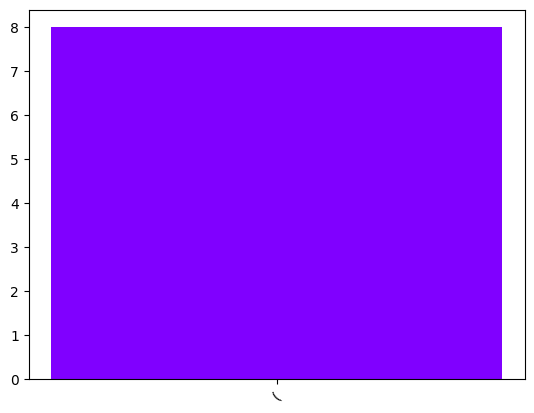

In [27]:
plot_model(three_grams, "def", "add")

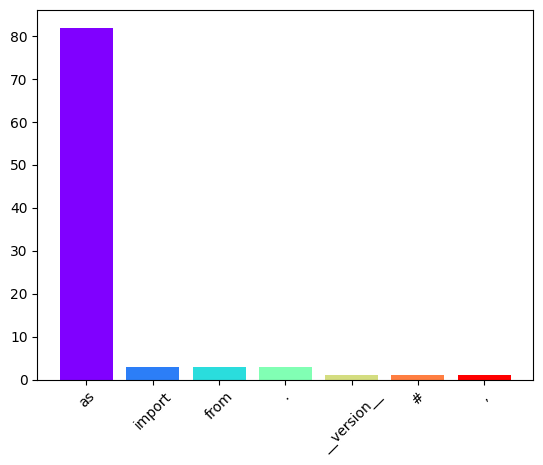

In [28]:
plot_model(three_grams, "import", "numpy")

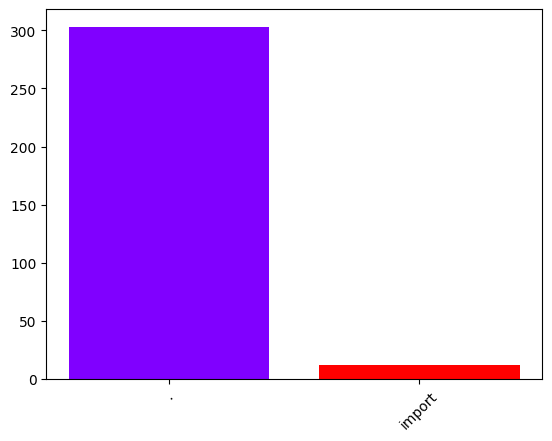

In [29]:
plot_model(three_grams, "from", "django")